# IMPORTING THE DATA

In [1]:
#Libraries
import pandas as pd
import gzip
import json


In [2]:
#importing json file as df
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:\\Users\\keesi\\Downloads\\reviews_Beauty_5.json.gz')

In [3]:
df#raw data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"
...,...,...,...,...,...,...,...,...,...
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,Dave Edmiston,"[0, 0]",Just a little dab of this shea butter should b...,5.0,A little dab...,1405468800,"07 16, 2014"
198498,A1UQBFCERIP7VJ,B00LLPT4HI,Margaret Picky,"[0, 0]",This shea butter is completely raw and unrefin...,5.0,Pure organic raw shea butter,1405296000,"07 14, 2014"
198499,A35Q0RBM3YNQNF,B00LLPT4HI,M. Hill,"[0, 0]",The skin is the body's largest organ and it ab...,5.0,One Pound Organic Grade A Unrefined Shea Butter,1405468800,"07 16, 2014"
198500,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5.0,This stuff is amazing!,1405382400,"07 15, 2014"


In [4]:
df["helpful"]

0         [3, 4]
1         [1, 1]
2         [0, 1]
3         [2, 2]
4         [0, 0]
           ...  
198497    [0, 0]
198498    [0, 0]
198499    [0, 0]
198500    [0, 0]
198501    [0, 1]
Name: helpful, Length: 198502, dtype: object

# Data PreProcessing

In [5]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1386
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

Reviewer Name is not required for this analysis

# Adding extra features

In [6]:
import pandas as pd
help1=pd.DataFrame(df['helpful'].tolist(),columns=['h1','h2'])

In [7]:
help1

,h1,h2
0,3,4
1,1,1
2,0,1
3,2,2
4,0,0
...,...,...
198497,0,0
198498,0,0
198499,0,0
198500,0,0


In [8]:
type(help1)

pandas.core.frame.DataFrame

In [9]:
hs=(help1["h1"]+help1["h2"])
hf=pd.DataFrame((help1["h1"]/hs)*100)
type(hf)
hf.rename(columns = {0:'h'}, inplace = True)
hf

,h
0,42.857143
1,50.000000
2,0.000000
3,50.000000
4,NaN
...,...
198497,NaN
198498,NaN
198499,NaN
198500,NaN


Derived attribute h.

In [10]:
#Concordinating Data frames
help1=pd.concat([help1,hf],axis=1)
help1.head(1)

,h1,h2,h
0,3,4,42.857143


In [11]:
help1['h']=help1['h'].fillna(0)####Filling the null values as "0"
help1

,h1,h2,h
0,3,4,42.857143
1,1,1,50.000000
2,0,1,0.000000
3,2,2,50.000000
4,0,0,0.000000
...,...,...,...
198497,0,0,0.000000
198498,0,0,0.000000
198499,0,0,0.000000
198500,0,0,0.000000


In [12]:
help1.isnull().sum()

h1    0
h2    0
h     0
dtype: int64

In [25]:
df1=pd.concat([help1,df],axis=1)
df1.head(1)#####################whole data set

,h1,h2,h,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,3,4,42.857143,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"


In [26]:
df1['summary'] = df1['summary'] + df1['reviewText']
print(df1)

        h1  h2          h      reviewerID        asin  \
0        3   4  42.857143  A1YJEY40YUW4SE  7806397051   
1        1   1  50.000000   A60XNB876KYML  7806397051   
2        0   1   0.000000  A3G6XNM240RMWA  7806397051   
3        2   2  50.000000  A1PQFP6SAJ6D80  7806397051   
4        0   0   0.000000  A38FVHZTNQ271F  7806397051   
...     ..  ..        ...             ...         ...   
198497   0   0   0.000000  A2BLFCOPSMBOZ9  B00LLPT4HI   
198498   0   0   0.000000  A1UQBFCERIP7VJ  B00LLPT4HI   
198499   0   0   0.000000  A35Q0RBM3YNQNF  B00LLPT4HI   
198500   0   0   0.000000  A3LGT6UZL99IW1  B00LLPT4HI   
198501   0   1   0.000000  A3UJRNI8UR4871  B00LLPT4HI   

                                            reviewerName helpful  \
0                                                 Andrea  [3, 4]   
1                                             Jessica H.  [1, 1]   
2                                                  Karen  [0, 1]   
3                                          

# Converting the date into [DD/MM/YYYY]

In [27]:
df1.dtypes

h1                  int64
h2                  int64
h                 float64
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

Review time is in object data type . So Datatype convertion is required.

In [28]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])
df1['year']= df1['reviewTime'].dt.year
df1['month']= df1['reviewTime'].dt.month
df1['day']= df1['reviewTime'].dt.day

In [29]:
df1.head(3)

,h1,h2,h,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,month,day
0,3,4,42.857143,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your moneyVery oily and creamy. No...,1391040000,2014-01-30,2014,1,30
1,1,1,50.000000,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!This palette was a decent price and...,1397779200,2014-04-18,2014,4,18
2,0,1,0.000000,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great qualityThe texture of this concealer pal...,1378425600,2013-09-06,2013,9,6


In [30]:
#Filtering out the required columns and storing it in different dataframe.
df1=df1[["h","reviewerID","asin","overall","summary","year","month","day","reviewTime"]]
df1.head(15)

,h,reviewerID,asin,overall,summary,year,month,day,reviewTime
0,42.857143,A1YJEY40YUW4SE,7806397051,1.0,Don't waste your moneyVery oily and creamy. No...,2014,1,30,2014-01-30
1,50.000000,A60XNB876KYML,7806397051,3.0,OK Palette!This palette was a decent price and...,2014,4,18,2014-04-18
2,0.000000,A3G6XNM240RMWA,7806397051,4.0,great qualityThe texture of this concealer pal...,2013,9,6,2013-09-06
3,50.000000,A1PQFP6SAJ6D80,7806397051,2.0,Do not work on my faceI really can't tell what...,2013,12,8,2013-12-08
4,0.000000,A38FVHZTNQ271F,7806397051,3.0,It's okay.It was a little smaller than I expec...,2013,10,19,2013-10-19
5,33.333333,A3BTN14HIZET6Z,7806397051,5.0,Very nice palette!I was very happy to get this...,2013,4,15,2013-04-15
6,25.000000,A1Z59RFKN0M5QL,7806397051,1.0,smh!!!PLEASE DONT DO IT! this just rachett the...,2013,8,16,2013-08-16
7,0.000000,AWUO9P6PL1SY8,7806397051,2.0,"Chalky, Not Pigmented, Wears off easily, Not a...",2013,9,4,2013-09-04
8,0.000000,A3LMILRM9OC3SA,9759091062,2.0,"no Lightening, no Brightening,......NOTHINGDid...",2014,7,13,2014-07-13
9,0.000000,A30IP88QK3YUIO,9759091062,3.0,Its alrightI bought this product to get rid of...,2013,12,27,2013-12-27


In [31]:
df1.dtypes

h                    float64
reviewerID            object
asin                  object
overall              float64
summary               object
year                   int64
month                  int64
day                    int64
reviewTime    datetime64[ns]
dtype: object

In [32]:
df1['overall'] = df1['overall'].astype(int)

In [33]:
df1.dtypes

h                    float64
reviewerID            object
asin                  object
overall                int32
summary               object
year                   int64
month                  int64
day                    int64
reviewTime    datetime64[ns]
dtype: object

In [34]:
df1.head(15)#cleaned data

,h,reviewerID,asin,overall,summary,year,month,day,reviewTime
0,42.857143,A1YJEY40YUW4SE,7806397051,1,Don't waste your moneyVery oily and creamy. No...,2014,1,30,2014-01-30
1,50.000000,A60XNB876KYML,7806397051,3,OK Palette!This palette was a decent price and...,2014,4,18,2014-04-18
2,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityThe texture of this concealer pal...,2013,9,6,2013-09-06
3,50.000000,A1PQFP6SAJ6D80,7806397051,2,Do not work on my faceI really can't tell what...,2013,12,8,2013-12-08
4,0.000000,A38FVHZTNQ271F,7806397051,3,It's okay.It was a little smaller than I expec...,2013,10,19,2013-10-19
5,33.333333,A3BTN14HIZET6Z,7806397051,5,Very nice palette!I was very happy to get this...,2013,4,15,2013-04-15
6,25.000000,A1Z59RFKN0M5QL,7806397051,1,smh!!!PLEASE DONT DO IT! this just rachett the...,2013,8,16,2013-08-16
7,0.000000,AWUO9P6PL1SY8,7806397051,2,"Chalky, Not Pigmented, Wears off easily, Not a...",2013,9,4,2013-09-04
8,0.000000,A3LMILRM9OC3SA,9759091062,2,"no Lightening, no Brightening,......NOTHINGDid...",2014,7,13,2014-07-13
9,0.000000,A30IP88QK3YUIO,9759091062,3,Its alrightI bought this product to get rid of...,2013,12,27,2013-12-27


# Storing the data into CSV file

In [35]:
#df1.to_csv('Beauty_R1.csv')#storing in csv file

# EDA

In [36]:
df1["overall"].value_counts()

5    114531
4     39741
3     22248
2     11456
1     10526
Name: overall, dtype: int64

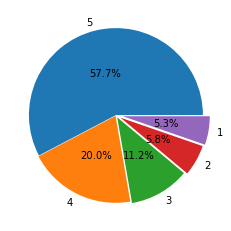

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
d1=df1["overall"].value_counts()
label1=d1.keys()
plt.pie(x = d1, autopct = "%.1f%%", labels = label1, pctdistance = 0.5,explode = [0,0.01,0.03,0.06,0.08])
plt.show()

Majority of the customers rated beauty product as 5 values

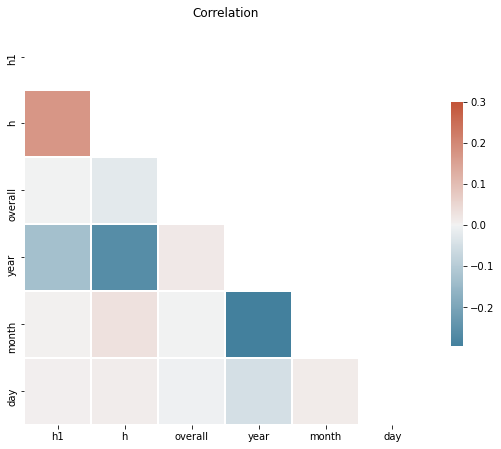

,h1,h,overall,year,month,day
h1,1.000000,0.172443,-0.000885,-0.131243,0.005118,0.006498
h,0.172443,1.000000,-0.022487,-0.259881,0.031746,0.010165
overall,-0.000885,-0.022487,1.000000,0.018764,-0.001274,-0.001971
year,-0.131243,-0.259881,0.018764,1.000000,-0.294259,-0.047714
month,0.005118,0.031746,-0.001274,-0.294259,1.000000,0.013429
day,0.006498,0.010165,-0.001971,-0.047714,0.013429,1.000000


In [24]:
import numpy as np
dfc=df1.corr()
mask = np.triu(np.ones_like(dfc, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfc, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlation")
plt.show()
df1.corr()

"No correlation is found between overall rating and other numerical features"